# NRC EMOTIONAL LEXICON

NRC Léxico é uma lista de palavras em inglês, onde cada uma é associada com oito sentimentos distintos, sendo eles anger, fear, anticipation, trust, surprise, sadness, joy, and disgust, além de duas polaridades sendo: positivo e negativo.

Download disponivel no link: http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

In [3]:
import pandas as pd
import wget
import os
from zipfile import ZipFile

## Vamos fazer o download dos dados

In [17]:

url = "http://sentiment.nrc.ca/lexicons-for-research/NRC-Emotion-Lexicon.zip"

def download_from_url(url):
    if not os.path.exists('data'):
        os.mkdir('data')
    
    wget.download(url, 'data')
    
download_from_url(url)

In [18]:
#função para extrair um arquivo de um zip

path_to_zip = 'data/NRC-Emotion-Lexicon.zip'
path_to_write = 'data/'
path_to_file = 'NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

def extract_from_zip(path_to_zip, path_to_file, path_to_write):
    with ZipFile(path_to_zip, 'r') as zipObj:    
        list_files = zipObj.namelist()
        for filename in list_files:
            if filename == path_to_file:
                print("Extraindo...")
                zipObj.extract(filename, path_to_write)

In [19]:
extract_from_zip(path_to_zip, path_to_file, path_to_write)

Extraindo...


## Lendo Dataset

In [22]:
file = 'data/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

lexicon = pd.read_csv(file, names=['palavra', 'sentimento', 'pertence'], sep='\t')

In [25]:
lexicon.head(-10)

,palavra,sentimento,pertence
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141805,zoology,negative,0
141806,zoology,positive,0
141807,zoology,sadness,0
141808,zoology,surprise,0


In [24]:
#verificando categorias únicas de sentimento
lexicon.sentimento.unique()

array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'], dtype=object)

In [26]:
lexicon.palavra.unique().shape

(14182,)

In [29]:
#distribuição dos sentimentos
lexicon[lexicon.pertence == 1].sentimento.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: sentimento, dtype: int64

In [31]:
#palavras com polaridade positiva
lexicon[(lexicon.pertence == 1) & (lexicon.sentimento == 'positive')].head(-10)

,palavra,sentimento,pertence
76,abba,positive,1
206,ability,positive,1
366,abovementioned,positive,1
486,absolute,positive,1
496,absolution,positive,1
...,...,...,...
140506,wondrous,positive,1
140626,word,positive,1
140696,working,positive,1
140856,worship,positive,1


In [32]:
lexicon[(lexicon.palavra == 'happy') & (lexicon.pertence == 1)]

,palavra,sentimento,pertence
57871,happy,anticipation,1
57874,happy,joy,1
57876,happy,positive,1
57879,happy,trust,1


In [33]:
#categorias de sentimento da palavra hate - ódio 
lexicon[(lexicon.palavra == 'hate') & (lexicon.pertence == 1)]

,palavra,sentimento,pertence
58260,hate,anger,1
58262,hate,disgust,1
58263,hate,fear,1
58265,hate,negative,1
58267,hate,sadness,1


In [36]:
# pivotear a tabela
pivot_lexicon = lexicon.pivot(index='palavra', columns='sentimento', values='pertence').reset_index()
pivot_lexicon.head()

sentimento,palavra,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0


In [39]:
#palavras que pertençam a categoria joy e negative ao mesmo tempo - contradição
pivot_lexicon[(pivot_lexicon.joy == 1) & (pivot_lexicon.negative == 1)]

sentimento,palavra,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
62,abundance,0,1,1,0,1,1,1,0,0,1
1019,balm,0,1,0,0,1,1,1,0,0,0
1383,boisterous,1,1,0,0,1,1,1,0,0,0
1917,celebrity,1,1,1,0,1,1,1,0,1,1
2005,charmed,0,0,0,0,1,1,1,0,0,0
4281,endless,1,0,0,1,1,1,1,1,0,1
4417,erotic,0,1,0,0,1,1,1,0,1,1
4819,feeling,1,1,1,1,1,1,1,1,1,1
5009,flirt,0,1,0,0,1,1,1,0,1,1
5717,gush,0,0,1,0,1,1,0,0,0,0


In [40]:
#palavras da categoria joy
pivot_lexicon[pivot_lexicon.joy == 1].palavra

50          absolution
62           abundance
63            abundant
86            accolade
89       accompaniment
             ...      
14162            young
14164            youth
14167             zeal
14169          zealous
14174             zest
Name: palavra, Length: 689, dtype: object

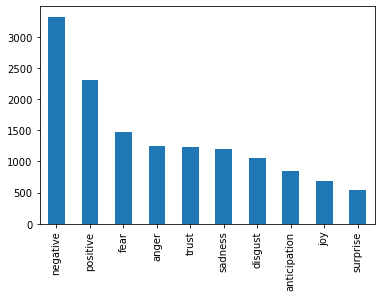

In [41]:
#distribuição das categorias de sentimento em plot
lexicon[lexicon.pertence == 1].sentimento.value_counts().plot(kind = 'bar')

## Opinion Lexicon

Hu & Liu Opinion Lexicon - https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [45]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/stefanini/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [46]:
opinion_lexicon.words()

['2-faced', '2-faces', 'abnormal', 'abolish', ...]

In [47]:
len(opinion_lexicon.words())

6789

In [49]:
opinion_lexicon.negative()[0:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [50]:
opinion_lexicon.positive()[0:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [51]:
#listas de palavras negativas e positivas - opinion lexicon
pos_list = set(opinion_lexicon.positive())
neg_list = set(opinion_lexicon.negative())

In [52]:
len(pos_list)

2006

In [53]:
len(neg_list)

4783

### Aplicando léxicos a um dataset

Vamos usar uma parte dos dados do conjunto de dados Economic News Article Tone 2016 (https://data.world/crowdflower/economic-news-article-tone), disponível por CrowdFlower. As notícias sobre a economia americana são coletadas de vários sites de notícias publicadas entre 1951 e 2014. Há para cada notícia, um sentimento dado por um jhumano em uma escala de 1 a 9, onde 1 é o mais negativo e 9 o mais positivo. Também existe o nível de confidência sobre a classificação dada em uma escala de 0 a.

Há 8000 artigos de notícias e quinze colunas:

- articleid: id do artigo
- text: conteúdo textual 
- date: data de publicação
- positivity: sentimento dado por humano (ground truth)human-rated sentiment - 1(most negative)-9(most positive)
- positivity.confidence: confidence of human rating

In [55]:
#extraindo arquivo de dados
path_to_zip = 'data/dataset.zip'
path_to_file = 'crowdflower-economic-news-article-tone/data/full_economic_news_dfe_839861.csv'
path_write = 'data/'

extract_from_zip(path_to_zip, path_to_file, path_to_write)

Extraindo...


In [63]:
#lendo dataset
file = 'data/crowdflower-economic-news-article-tone/data/full_economic_news_dfe_839861.csv'

dataset = pd.read_csv(file)

In [64]:
dataset.head(5)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,positivity,positivity_confidence,relevance,relevance_confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,2015-12-05T17:48:00,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,2015-12-05T16:54:00,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,2015-12-05T01:59:00,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,2015-12-05T02:19:00,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,2015-12-05T17:48:00,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [65]:
#verificando dados 
dataset.apply(lambda x: x.count(), axis=0)

unit_id                  8000
golden                   8000
unit_state               8000
trusted_judgments        8000
last_judgment_at         8000
positivity               1420
positivity_confidence    3775
relevance                8000
relevance_confidence     8000
articleid                8000
date                     8000
headline                 8000
positivity_gold             0
relevance_gold              0
text                     8000
dtype: int64

In [66]:
#selecionando colunas que irão ser usadas
dataset = dataset.loc[:, ['unit_id', 'positivity', 'positivity_confidence', 'text']]
dataset.shape

(8000, 4)

In [67]:
#removendo linhas com valores nulos
dataset.dropna(inplace=True)
dataset.shape

(1420, 4)

Text(0, 0.5, 'Count')

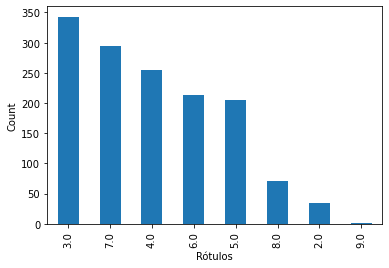

In [68]:
#distribuição dos rótulos
ax = dataset.positivity.value_counts(sort=True).plot(kind='bar')
ax.set_xlabel('Rótulos')
ax.set_ylabel('Count')


In [74]:
from bs4 import BeautifulSoup
import string
from unidecode import unidecode
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

#métodos para limpeza simples do texto

def clean_html(text):
    soup = BeautifulSoup(text, 'html')
    for s in soup(['script', 'style']):
        s.decompose()

    return "".join(soup.stripped_strings)


def remove_punctuation(text):
    
    text = [word for word in text if word not in string.punctuation]
    text = ''.join(text)
    
    return text


def remove_stopwords(text):
    text = unidecode(text)
    text = [word.lower() for word in text.split() if word.lower() not in stopwords]
    
    return " ".join(text)



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/stefanini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
#aplicando limpeza no dataset e salvando em nova coluna

dataset['clean_text'] = dataset['text'].apply(clean_html)
dataset['clean_text'] = dataset['clean_text'].apply(remove_punctuation)
dataset['clean_text'] = dataset['clean_text'].apply(remove_stopwords)

dataset['text'] = dataset['text'].str.lower()

In [76]:
#exemplo de texto
dataset['clean_text'][0]

'new york yields certificates deposit offered major banks dropped tenth percentage point latest week reflecting overall decline shortterm interest rateson smalldenomination consumer cds sold directly banks average yield sixmonth deposits fell 549 562 week ended yesterday according 18bank survey banxquote money markets wilmington del information serviceon threemonth consumer deposits average yield sank 529 542 week according banxquote two banks banxquote survey citibank new york corestates pennsylvania paying less 5 threemonth smalldenomination cdsdeclines somewhat smaller fiveyear consumer cds eased 737 745 banxquote saidyields threemonth sixmonth treasury bills sold mondays auction plummeted fifth percentage point previous week 546 563 respectively'

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [87]:
corpus = " ".join(dataset['clean_text'].tolist())

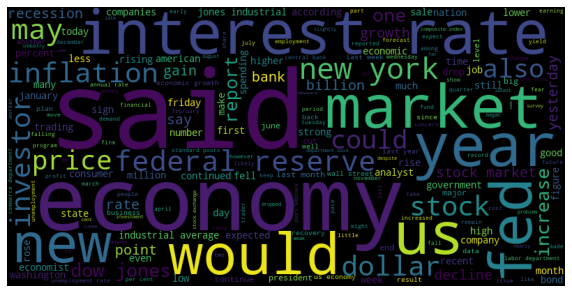

In [88]:
wc = WordCloud(width=800, height=400, max_words=200, stopwords=stopwords)

wc.generate(corpus)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [90]:
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

In [91]:
#função que conta sentimentos

def sentiment(sentence, pos_list, neg_list):
    sent = 0
    words = [word for word in tokenizer.tokenize(sentence)]
    
    for word in words:
        if word in pos_list:
            sent += 1
        elif word in neg_list:
            sent -= 1
    
    return sent

### Aplicando regra de sentimento ao dataset com opinion lexicon

In [93]:
dataset['sentiment_clean'] = dataset['clean_text'].apply(sentiment, args=(pos_list, neg_list))

In [94]:
dataset['sentiment_clean']

0      -1
4      -2
5      -6
9      -6
12      2
       ..
7973   -1
7974    5
7984    3
7987   -7
7995    0
Name: sentiment_clean, Length: 1420, dtype: int64

### Aplicando regra de sentimento ao dataset com NRC

In [96]:
nrc_pos = set(pivot_lexicon[pivot_lexicon.positive == 1].palavra)
nrc_neg = set(pivot_lexicon[pivot_lexicon.negative == 1].palavra)

In [97]:
#léxico NRC
dataset['sentiment_clean_nrc'] = dataset['clean_text'].apply(sentiment, args=(nrc_pos, nrc_neg))

In [98]:
dataset['sentiment_clean_nrc']

0        2
4        5
5       -2
9       -2
12      -9
        ..
7973     4
7974     8
7984    10
7987     2
7995    10
Name: sentiment_clean_nrc, Length: 1420, dtype: int64

### Padronização de rótulos e estimativas de sentimento

In [106]:
### Função para padronizar rotulação
def group_dataset_sentiment(value):
    if value <= 3:
        final_value = -1
    elif value > 3 and value <= 6:
        final_value = 0
    elif value > 6:
        final_value = 1
    return final_value

In [107]:
#aplicar padronização de rótulos no dataset

dataset['grouped_label'] = dataset['positivity'].apply(group_dataset_sentiment)
dataset['grouped_label']
dataset.groupby('grouped_label').count()

,unit_id,positivity,positivity_confidence,text,clean_text,sentiment_clean,sentiment_clean_nrc,grouped_sent
grouped_label,,,,,,,,
-1,378,378,378,378,378,378,378,378
0,674,674,674,674,674,674,674,674
1,368,368,368,368,368,368,368,368


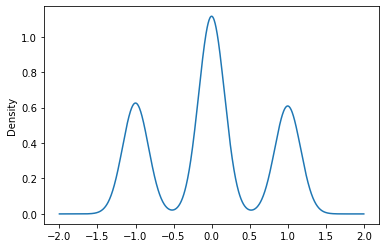

In [108]:
#visualizar densidade de rótulos agrupados
dataset['grouped_label'].plot(kind='density')

In [112]:
### Função para padronizar estimativa
def group_dataset_sentiment_estimativa(value):
    if value < 0:
        final_value = -1
    elif value >=0 and value <= 2:
        final_value = 0
    elif value > 2:
        final_value = 1
    return final_value

In [113]:
#aplicando padronização de estimativas nas estimativas com opinion lexicon
dataset['grouped_sent'] = dataset['sentiment_clean'].apply(group_dataset_sentiment_estimativa)
dataset['grouped_sent'].unique()

array([-1,  0,  1])

In [114]:
dataset.groupby('grouped_sent').count()

,unit_id,positivity,positivity_confidence,text,clean_text,sentiment_clean,sentiment_clean_nrc,grouped_label
grouped_sent,,,,,,,,
-1,778,778,778,778,778,778,778,778
0,335,335,335,335,335,335,335,335
1,307,307,307,307,307,307,307,307


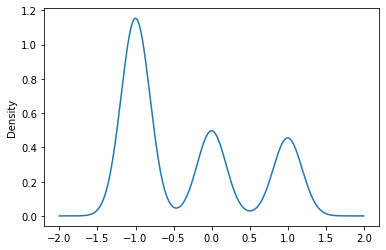

In [115]:
#visualizar densidades das estimativas com opinion lexicon
dataset['grouped_sent'].plot(kind='density')

In [116]:
#aplicando padronização de estimativas nas estimativas com NRC
dataset['grouped_sent_nrc'] = dataset['sentiment_clean_nrc'].apply(group_dataset_sentiment_estimativa)
dataset['grouped_sent_nrc'].unique()

array([ 0,  1, -1])

In [117]:
dataset.groupby('grouped_sent_nrc').count()

,unit_id,positivity,positivity_confidence,text,clean_text,sentiment_clean,sentiment_clean_nrc,grouped_label,grouped_sent
grouped_sent_nrc,,,,,,,,,
-1,339,339,339,339,339,339,339,339,339
0,307,307,307,307,307,307,307,307,307
1,774,774,774,774,774,774,774,774,774


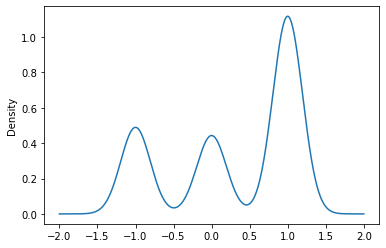

In [118]:
#visualizar densidades das estimativas com NRC

dataset['grouped_sent_nrc'].plot(kind='density')

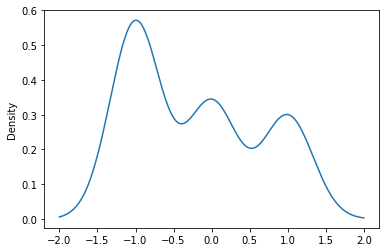

In [121]:
#visualizar densidades das estimativas com opinion lexicon e alta confiança
dataset.loc[dataset['positivity_confidence']>=0.70]['grouped_sent'].plot(kind='density')

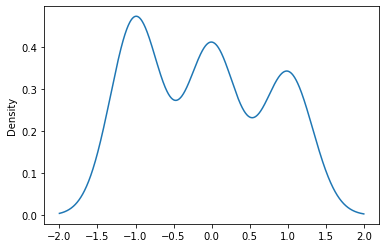

In [122]:
#visualizar densidades dos labels com alta confiança
dataset.loc[dataset['positivity_confidence']>=0.70]['grouped_label'].plot(kind='density')

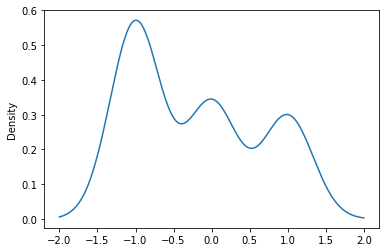

In [123]:
#visualizar densidades das estimativas com opinion lexicon e alta confiança
dataset.loc[dataset['positivity_confidence']>=0.70]['grouped_sent'].plot(kind='density')

### Aplicando métricas para avaliação do resultado

In [124]:
dataset.loc[dataset['positivity_confidence']>=0.70, ['grouped_label', 'grouped_sent_nrc']].corr()

,grouped_label,grouped_sent_nrc
grouped_label,1.000000,0.254528
grouped_sent_nrc,0.254528,1.000000


In [125]:
dataset.loc[dataset['positivity_confidence']>=0.70, ['grouped_label', 'grouped_sent']].corr()

,grouped_label,grouped_sent
grouped_label,1.000000,0.547867
grouped_sent,0.547867,1.000000


In [127]:
#métricas de avaliação
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [128]:
accuracy_score(dataset['grouped_label'], dataset['grouped_sent'])

0.38591549295774646

In [129]:
f1_score(dataset['grouped_label'], dataset['grouped_sent'], average='macro')

0.3774819515979069

In [130]:
accuracy_score(dataset['grouped_label'], dataset['grouped_sent_nrc'])

0.33098591549295775

In [131]:
f1_score(dataset['grouped_label'], dataset['grouped_sent_nrc'], average='macro')

0.32838809375934686

In [132]:
f1_score(dataset['grouped_label'], dataset['grouped_sent_nrc'], average='micro')

0.33098591549295775

In [133]:
print(classification_report(dataset['grouped_label'], dataset['grouped_sent']))

              precision    recall  f1-score   support

          -1       0.34      0.71      0.46       378
           0       0.49      0.24      0.33       674
           1       0.38      0.32      0.34       368

    accuracy                           0.39      1420
   macro avg       0.40      0.42      0.38      1420
weighted avg       0.42      0.39      0.37      1420



In [134]:
print(classification_report(dataset['grouped_label'], dataset['grouped_sent_nrc']))

              precision    recall  f1-score   support

          -1       0.35      0.31      0.33       378
           0       0.44      0.20      0.27       674
           1       0.28      0.59      0.38       368

    accuracy                           0.33      1420
   macro avg       0.36      0.37      0.33      1420
weighted avg       0.37      0.33      0.32      1420

